# 2018-02-20 Econ 101b Problem Set 8 with DRAFT answers

## Problem set will be due Th Mar 15 at midnight...

#### Sections between Tu AM & Th AM lecture will be problem set section...

## Setting up the Python/Jupyter environment

In [1]:
%%javascript

IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;}

<IPython.core.display.Javascript object>

In [2]:
# ABOVE CELL IS "NO SCROLLING SUBWINDOWS" SETUP
#
# keep output cells from shifting to autoscroll: little scrolling
# subwindows within the notebook are an annoyance...

In [3]:
# THIS CELL LOADS THE LIBRARIES
#
# set up the environment by reading in every library we might need: 
# os... graphics... data manipulation... time... math... statistics...

import sys
import os
from urllib.request import urlretrieve

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image

import pandas as pd
from pandas import DataFrame, Series
from datetime import datetime

import scipy as sp
import numpy as np
import math
import random

import seaborn as sns
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

/Users/delong/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
# PRETTIER GRAPHICS SETUP
#
# graphics setup: seaborn-whitegrid and figure size;
# graphs in the notebook itself...

%matplotlib inline 

plt.style.use('seaborn-whitegrid')

figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 12
figure_size[1] = 10
plt.rcParams["figure.figsize"] = figure_size

In [5]:
# THIS CELL IS THE KEY TO THE OKPY.ORG AUTOGRADER SYSTEM
#
# Don't change this cell; just run it. 
# The result will give you directions about how to log in to the submission system, called OK.
# Once you're logged in, you can run this cell again, but it won't ask you who you are because
# it remembers you. However, you will need to log in once per assignment.

!pip install -U okpy

from client.api.notebook import Notebook

ok = Notebook('ps8.ok')
_ = ok.auth(force=True, inline=True)

Requirement already up-to-date: okpy in /Users/delong/anaconda3/lib/python3.6/site-packages
Requirement already up-to-date: requests==2.12.4 in /Users/delong/anaconda3/lib/python3.6/site-packages (from okpy)
Requirement already up-to-date: coverage==3.7.1 in /Users/delong/anaconda3/lib/python3.6/site-packages (from okpy)
Assignment: PS8 Notebook
OK, version v1.13.10


Open the following URL:

https://okpy.org/client/login/

After logging in, copy the code from the web page and paste it into the box.
Then press the "Enter" key on your keyboard.

Paste your code here: FmiyGZenS8AOBCpn8qN0cvidg4R52q
Successfully logged in as jbdelong@berkeley.edu


### ⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎
### RUN THESE CELLS ABOVE FIRST

# Problem Set 8 (Due Mar 15 11:59:59 PM)

----

&nbsp;

## Introduction

The autograder, both in the tests you run along the way as you work on the problem set and in calculating the final score, looks in the same directory as the problem set notebook for an "ok.tests" directory, and then runs the tests in the "q\*\*.py" files in that directory (where "\*\*" denotes a two-digit number, possibly with a leading zero). Those tests take the form of comparing a variable that should be in your namespace and seeing if it is close to some desired value that we get when we do the problem set.

Thus while the problem set instructions ask you to run simulations and plot graphs, what you are tested on is whether the appropriate variables in your namespace have (close to the) right values. We do not care what code you use in order to get those variables to the right values. 

You can run simulations and then pick appropriate values out by slicing a series in order to get the right number. 

You can use your knowledge of the algebraic solution to the model to have Python calculate the answer, having first set the parameters to the right values, as in:

    s = 0.24 # (say)
    n = 0.01
    g = 0.02
    delta = 0.03
    Delta_n = -0.01
    KoverYinitial = s/(n+g+delta)
    KoverYalternative = s/(n+Delta_n+g+delta)
    
You can even do all of the calculations on pen and paper, and simply code up:

    KoverYinitial = 4
    KoverYalternative = 4.8
    
Perhaps we should ask you to do all three—start with simulations, or with algebraic equations with set parameter values, or with full pen-and-paper calculations with only the final results entered into the notebook—and then ask you to check your results from one mode by doing the other two. But: _ars longa, vita brevis_. Focus on what works _for you_: the key is to get a sense of how economists' center-of-gravity analyses of long-run growth work, so that when you encounter such an analysis later, outside the university, you have the right intellectual panoply to evaluate it.

----

&nbsp;

## Programming Dos and Don'ts...

### A Running List...

1. **Do** restart your kernel and run cells up to your current working point every fifteen minutes or so. Yes, it takes a little time. But if you don't, sooner or later the machine's namespace will get confused, and then you will get confused about the state of the machine's namespace, and by assuming things about it that are false you will lose hours and hours...   
&nbsp;

2. **Do** reload the page when restarting the kernel does not seem to do the job...   
&nbsp;

3. **Do** edit code cells by copying them below your current version and then working on the copy: when you break everything in the current cell (as you will), you can then go back to the old cell and start fresh...   
&nbsp;

4. **Do** exercise agile development practices: if there is a line of code that you have not tested, test it. The best way to test is to ask the machine to echo back to you the thing you have just created in its namespace to make sure that it is what you want it to be. Only after you are **certain** that your namespace contains what you think it does should you write the next line of code. And then you should immediately test it...   
&nbsp;

5. **Do** take screenshots of your error messages...   
&nbsp;

6. **Do** google your error messages: Ms. Google is your best friend here...   
&nbsp;

7. **Do not** confuse assignment ("=") and test for equality ("=="). In general, if there is an "if" anywhere nearby, you should be testing for equality. If there is not, you should be assignment a variable in your namespace to a value. **Do** curse the mathematicians 500 years ago who did not realize that in the twenty-first century it would be very convenient if we had different and not confusable symbols for equals-as-assignment and equals-as-test...   
&nbsp;

----

&nbsp;

**Thanks to**: Rachel Grossberg, Christopher Hench, Meghana Krishnakumer, Seth Lloyd, Ronald Walker...

**(Task A) Programming Practices**

If it strikes you that anything should be added to this list of programming dos and don'ts, please email it to me at <delong@econ.berkeley.edu>

----

**(Task B) Consumption Series I**

1. Websurf over to http://fred.stlouisfed.org
2. Type "consumption" into the search box and press return
3. Scan down the list of variables, focusing on variables that are "real", "seasonally adjusted", and "monthly".
4. Find "Real Personal Consumption Expenditures: Billions of Chained 2009 Dollars, Monthly, Seasonally Adjusted Annual Rate". Click on the box to select it. Click on the "Add to Graph" button near the top.
5. Click the "DOWNLOAD" button and then the "CSV (Data)" option
6. Open the file you have just downloaded, PCEC96.csv, in a text editor. Look at it. Does it look like the right thing? If not, email me at delong@econ.berkeley.edu with the subject line: "Econ 101b S2018 PS8: PCEC96.csv Does Not Look Right"

**(Task C) Consumption Series II**

1. I have put a copy of PCEC96.csv up on the web at URL: http://delong.typepad.com/pcec96.csv
2. Run the code cell "# Consumption Series Import Cell" below to load the "Real Personal Consumption Expenditures" data into your namespace in the cons_df object.
3. In the "# Examine Consumption Series" code cell further below, write code to examine what is in the "cons_df" object.
4. Plot the Real Personal Consumption Expenditures series PCEC96:
In the "# Task C Answers" code cell further below set the variables "Cons_Jan_2000" and "Cons_Jan_2010" to their correct values

In [6]:
# Consumption Series Import Cell

import pandas as pd

Source_URL = 'http://delong.typepad.com/pcec96.csv' 

cons_df = pd.read_csv(
    Source_URL, 
    converters = {'Source': str, 'Source_URL': str}, 
    parse_dates = True,
    index_col = 0)


            PCEC96
DATE              
1999-01-01  7582.0
1999-02-01  7620.0
1999-03-01  7654.1
1999-04-01  7697.8
1999-05-01  7731.6
DATE
1999-01-01    7582.0
1999-02-01    7620.0
1999-03-01    7654.1
1999-04-01    7697.8
1999-05-01    7731.6
Name: PCEC96, dtype: float64


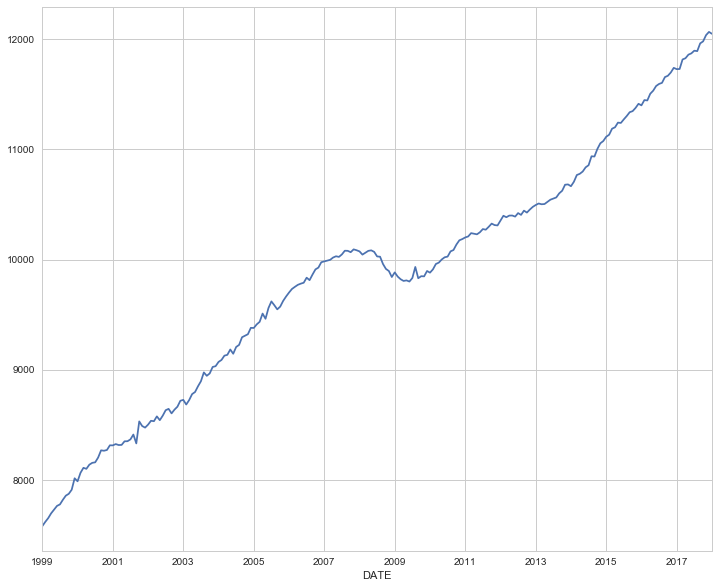

In [7]:
# Examine Consumption Series

print(cons_df.head())
print(cons_df.PCEC96.head())
cons_df.PCEC96.plot()

In [8]:
# Task C Answers

cons_Jan_2000 = cons_df.PCEC96[12]
cons_Jan_2010 = cons_df.PCEC96[132]

print(cons_Jan_2000)
print(cons_Jan_2010)

7988.5
9881.7


In [9]:
import numpy as np
ok.grade('q01')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 2}

----

&nbsp;

**(Task D) GDP Series I**

1. Websurf over to http://fred.stlouisfed.org
2. Type "real gdp" into the search box and press return
3. Scan down the list of variables, focusing on variables that are "real", "seasonally adjusted", and "quarterly".
4. Find "Real Gross Domestic Product: Billions of Chained 2009 Dollars, Quarterly, Seasonally Adjusted Annual Rate". Click on the box to select it. Click on the "Add to Graph" button near the top.
5. Enter '1999-01-01' into the left of the two date boxes to the left of the red "EDIT GRAPH" button and press return
6. Click the "DOWNLOAD" button and then the "CSV (Data)" option
7. Open the file you have just downloaded, GDPC1.csv, in a text editor. Look at it. Does it look like the right thing? If not, email me at delong@econ.berkeley.edu with the subject line: "Econ 101b S2018 PS8: GDPC1.csv Does Not Look Right"

**(Task E) GDP Series II**

1. I have put a copy of GDPC1.csv up on the web at URL: http://delong.typepad.com/gdpc1.csv
2. Run the code cell "# GDP Series Import Cell" below to load the "Real GDP" data into your namespace in the cons_df object.
3. In the "# Examine GDP Series" code cell further below, write code to examine what is in the "cons_df" object.
4. Plot the Real Personal Consumption Expenditures series PCEC96:
In the "# Task D Answers" code cell further below set the variables "Cons_Jan_2000" and "Cons_Jan_2010" to their correct values

In [10]:
# GDP Series Import Cell

import pandas as pd

Source_URL = 'http://delong.typepad.com/gdpc1.csv' 

gdp_df = pd.read_csv(
    Source_URL, 
    converters = {'Source': str, 'Source_URL': str}, 
    parse_dates = True,
    index_col = 0)


                GDPC1
DATE                 
1999-01-01  11864.675
1999-04-01  11962.524
1999-07-01  12113.075
1999-10-01  12323.336
2000-01-01  12359.095
DATE
1999-01-01    11864.675
1999-04-01    11962.524
1999-07-01    12113.075
1999-10-01    12323.336
2000-01-01    12359.095
Name: GDPC1, dtype: float64


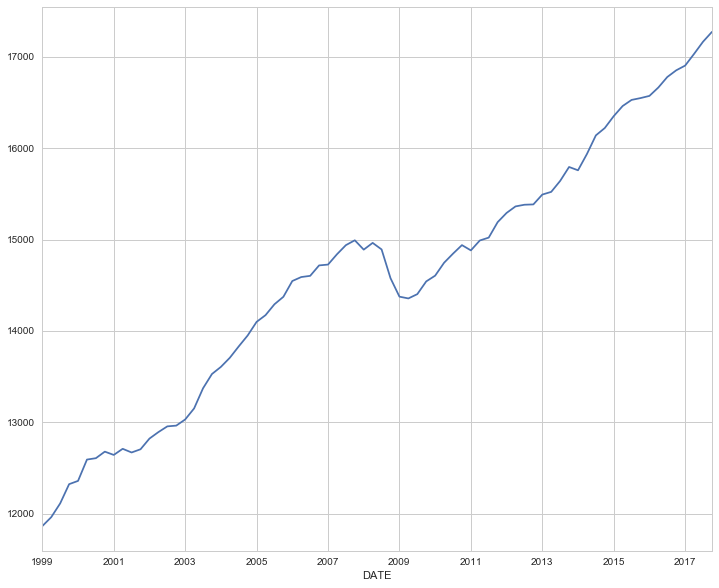

In [11]:
# Examine GDP Series

print(gdp_df.head())
print(gdp_df.GDPC1.head())
gdp_df.GDPC1.plot()

In [12]:
# Task D Answers

gdp_Jan_2000 = gdp_df.GDPC1[4]
gdp_Jan_2010 = gdp_df.GDPC1[44]

print(gdp_Jan_2000)
print(gdp_Jan_2010)

12359.095
14604.845


In [13]:
import numpy as np
ok.grade('q02')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 2}

----

&nbsp;

**(Task F) The Consumption Function I**:

1. Run the code cell "Graph consumption vs. income" immediately below, importing and plotting real consumption spending and real GDP since the early post-WWII period into a single dataframe. Examine the plot. Email me at delong@econ.berkeley.edu with the subject line "Econ 101b S2018 PS8: gdp_cons_df Does Not Look Right" if anything looks wrong to you
2. Run the code cell "Graph consumption vs. income" further below. That code cell performs a regression analysis: if consumption spending C is a simple linear function of GDP—national income—Y of the form $ C = a + bY + \epsilon $, where $ \epsilon $ are a host of additional variables not predictable from Y, what are the most likely values of the coefficients a and b, and how good a job do those coefficients and that function do at capturing the determinants of C?
3. The regression analysis tells us that the estimated value of the slope coefficient b from the regression of consumption spending C on income Y is 0.6607. What is the relationship between this coefficient and the MPC—the parameter $ c_y $ in our simple flexprice business cycle model? Assume that the tax rate t in the simple model is 0.25. In the code cell further below "Task F answers", set the variable c_y equal to your estimate of what the value of b tells us that the MPC is. 

         DATE   PCECC96     GDPC1
0  1947-01-01  1199.413  1934.471
1  1947-04-01  1219.329  1932.281
2  1947-07-01  1223.266  1930.315
3  1947-10-01  1223.649  1960.705
4  1948-01-01  1229.757  1989.535


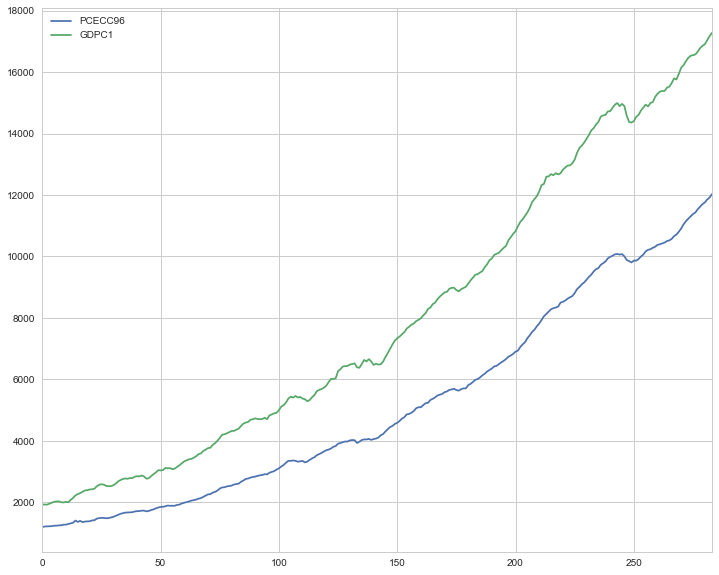

In [14]:
# Graph consumption vs. income

Source_URL = 'http://delong.typepad.com/gdp_cons.csv'

gdp_cons_df = pd.read_csv(
    Source_URL, 
    converters = {'Source': str, 'Source_URL': str}, 
    parse_dates = True
    )

print(gdp_cons_df.head())

gdp_cons_df.plot()

In [15]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = sm.OLS(gdp_cons_df.PCECC96, gdp_cons_df.GDPC1).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                PCECC96   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.972e+05
Date:                Sat, 10 Mar 2018   Prob (F-statistic):               0.00
Time:                        07:58:05   Log-Likelihood:                -1949.7
No. Observations:                 284   AIC:                             3901.
Df Residuals:                     283   BIC:                             3905.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GDPC1          0.6607      0.001    444.064      0.0

In [16]:
# Task F answers

t = 0.25
c_y = 0.6607/(1-t)
print(c_y)

0.8809333333333332


In [17]:
import numpy as np
ok.grade('q03')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 1}

----

&nbsp;

**(Task G) Consumption Function II**

Task F produced a very high estimate of the marginal propensity to consume, MPC, $ c_y $. It seemed to indicate that households do not smooth spending very much at all—that they take virtually all of a change in their income and spend it. This estimate was obtained because the overwhelming bulk of the identifying variance in the regression analysis of Task F consisted of permanent, long run changes in actual and expected income. Now let us look at shorter run, more temporary changes. We do this by performing a regression analysis in which the dependent and independent variables are not the simple levels of consumption spending C and national income Y, but rather one year changes in those variables scaled by the then-current level of real national income.

1. Run the code cell below "Calculating one year changes", which calculates and then plots one year changes in consumption spending C and national income Y, both of them as fractions of the then-current level of national income Y. Examine the plot. Email me at delong@econ.berkeley.edu with the subject line "Econ 101b S2018 PS8: Delta_C and Delta_Y DO Not Look Right" if anything looks wrong to you.
2. Run the code cell further below "1 year changes regression: full sample". Use the estimated b coefficient—the number immediately to the right of the "Delta_Y" under the heading "coef"—to calculate the estimate of the MPC $ c_y $ produced from examining one year changes. Assume once again that the tax rate t is 0.25. In the code cell "Task G answers", set the variable c_y_1_year equal to the estimate of the MPC.
3. Duplicate the code cell "Calculating one year changes". Then paste it immediately below. Alter the first line of the pasted version to read "# Calculating one year changes: earlier half of the sample"
4. Change the code in "# Calculating one year changes: earlier half of the sample" so that it runs the regression analysis for 1 year changes for only the first half of our 280 observation-long post-WWII data. In the code cell "Task G answers", set the variable c_y_1_year_early_sample equal to the estimate of the MPC for the first half of the sample.
5. Duplicate the code cell "Calculating one year changes". Then paste it immediately below. Alter the first line of the pasted version to read "# Calculating one year changes: later half of the sample"
6. Change the code in "# Calculating one year changes: later half of the sample" so that it runs the regression analysis for 1 year changes for only the second half of our 280 observation-long post-WWII data. In the code cell "Task G answers", set the variable c_y_1_year_late_sample equal to the estimate of the MPC for the second half of the sample.

         DATE   PCECC96     GDPC1   Delta_C   Delta_Y
0  1947-01-01  1199.413  1934.471  0.015686  0.028465
1  1947-04-01  1219.329  1932.281  0.012799  0.046355
2  1947-07-01  1223.266  1930.315  0.011722  0.053276
3  1947-10-01  1223.649  1960.705  0.016416  0.038060
4  1948-01-01  1229.757  1989.535  0.014130  0.009041


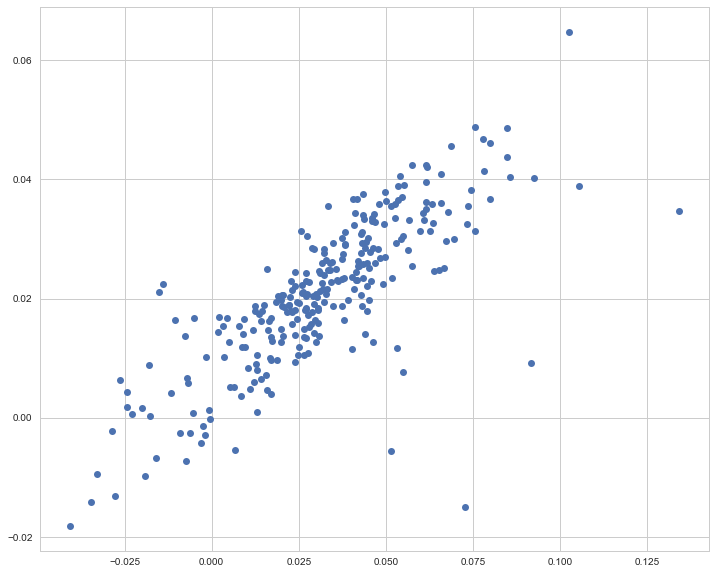

In [18]:
# Calculating one year changes

Delta_C = []
Delta_Y = []

for t in range(280):
    Delta_C = Delta_C + [(gdp_cons_df.PCECC96[t+4]-
        gdp_cons_df.PCECC96[t])/gdp_cons_df.GDPC1[t]]
    Delta_Y = Delta_Y + [(gdp_cons_df.GDPC1[t+4]-
        gdp_cons_df.GDPC1[t])/gdp_cons_df.GDPC1[t]]

Delta_C = Delta_C + [0] + [0] + [0] + [0]
Delta_Y = Delta_Y + [0] + [0] + [0] + [0]

gdp_cons_df['Delta_C'] = Delta_C
gdp_cons_df['Delta_Y'] = Delta_Y

print(gdp_cons_df.head())

plt.plot(gdp_cons_df.Delta_Y[:280], gdp_cons_df.Delta_C[:280], "o")

In [19]:
# 1 year changes regression: full sample

import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = sm.OLS(gdp_cons_df.Delta_C[:280], gdp_cons_df.Delta_Y[:280]).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Delta_C   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     1531.
Date:                Sat, 10 Mar 2018   Prob (F-statistic):          2.66e-115
Time:                        07:58:29   Log-Likelihood:                 903.98
No. Observations:                 280   AIC:                            -1806.
Df Residuals:                     279   BIC:                            -1802.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Delta_Y        0.5452      0.014     39.130      0.0

In [20]:
# 1 year changes regression: early sample

import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = sm.OLS(gdp_cons_df.Delta_C[:140], gdp_cons_df.Delta_Y[:140]).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Delta_C   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     585.5
Date:                Sat, 10 Mar 2018   Prob (F-statistic):           1.10e-51
Time:                        07:58:36   Log-Likelihood:                 428.04
No. Observations:                 140   AIC:                            -854.1
Df Residuals:                     139   BIC:                            -851.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Delta_Y        0.4933      0.020     24.198      0.0

In [21]:
# 1 year changes regression: late sample

import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = sm.OLS(gdp_cons_df.Delta_C[141:280], gdp_cons_df.Delta_Y[141:280]).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Delta_C   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     1881.
Date:                Sat, 10 Mar 2018   Prob (F-statistic):           2.80e-82
Time:                        07:58:41   Log-Likelihood:                 515.15
No. Observations:                 139   AIC:                            -1028.
Df Residuals:                     138   BIC:                            -1025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Delta_Y        0.6445      0.015     43.368      0.0

In [22]:
# Task G answers

t = 0.25
c_y_1_year = 0.5452/(1-t)
c_y_1_year_early_sample = 0.4933/(1-t)
c_y_1_year_late_sample = 0.6445/(1-t)

print(c_y_1_year)
print(c_y_1_year_early_sample)
print(c_y_1_year_late_sample)

0.7269333333333333
0.6577333333333334
0.8593333333333333


In [23]:
import numpy as np
ok.grade('q04')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 3}

----

&nbsp;

**(Task H) Consumption Function III**

Task F produced a very high estimate of the marginal propensity to consume out of disposable income, MPC, $ c_y $, indicating that households do not smooth spending very much at all—that they take virtually all of a change in their income and spend it. This estimate captures the MPC in response to permanent, long run changes in actual and expected income. But the MPC that is relevant for business cycle analysis is a short run MPC: the response of consumption to surprise, transitory changes in national income.

Task G produed somewhat smaller estimates of the MPC by looking at the reaction of consumption spending to one-year changes in national income.

Now let us look at one quarter changes. We do this by performing a regression analysis in which the dependent and independent variables are oen quarter changes in those variables scaled by the then-current level of real national income.

1. Run the code cell below "Calculating one quarter changes", which calculates and then plots one year changes in consumption spending C and national income Y, both of them as fractions of the then-current level of national income Y. Examine the plot. Email me at delong@econ.berkeley.edu with the subject line "Econ 101b S2018 PS8: Delta_C and Delta_Y DO Not Look Right" if anything looks wrong to you.
2. Run the code cell further below "1 quarter changes regression: full sample". Use the estimated b coefficient—the number immediately to the right of the "Delta_Y" under the heading "coef"—to calculate the estimate of the MPC $ c_y $ produced from examining one year changes. Assume once again that the tax rate t is 0.25. In the code cell "Task G answers", set the variable c_y_1_quarter equal to the estimate of the MPC.
3. Duplicate the code cell "Calculating one quarter changes". Then paste it immediately below. Alter the first line of the pasted version to read "# Calculating one quarter changes: earlier half of the sample"
4. Change the code in "# Calculating one quarter changes: earlier half of the sample" so that it runs the regression analysis for 1 year changes for only the first half of our 280 observation-long post-WWII data. In the code cell "Task G answers", set the variable c_y_1_quarter_early_sample equal to the estimate of the MPC for the first half of the sample.
5. Duplicate the code cell "Calculating one quarter changes". Then paste it immediately below. Alter the first line of the pasted version to read "# Calculating one quarter changes: later half of the sample"
6. Change the code in "# Calculating one quarter changes: later half of the sample" so that it runs the regression analysis for 1 year changes for only the seconc half of our 280 observation-long post-WWII data. In the code cell "Task G answers", set the variable c_y_1_quarter_late_sample equal to the estimate of the MPC for the second half of the sample.

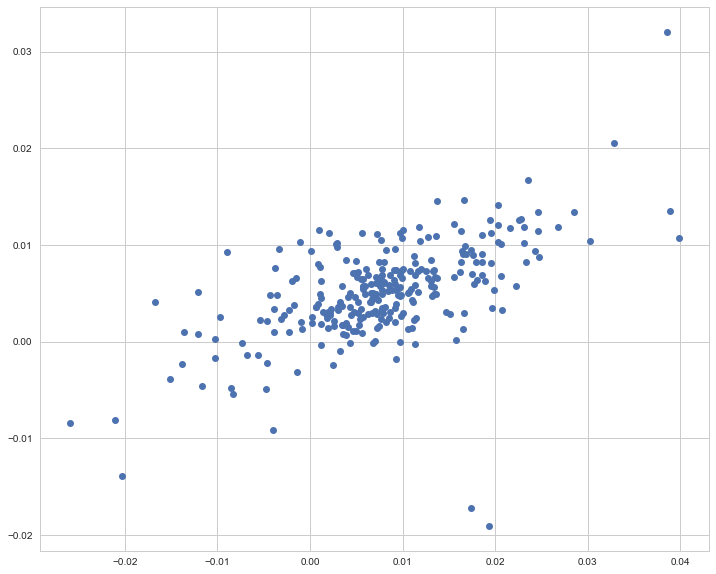

In [24]:
# Calculating one quarter changes

import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

Delta_C1 = []
Delta_Y1 = []

for t in range(280):
    Delta_C1 = Delta_C1 + [(gdp_cons_df.PCECC96[t+1]-
        gdp_cons_df.PCECC96[t])/gdp_cons_df.GDPC1[t]]
    Delta_Y1 = Delta_Y1 + [(gdp_cons_df.GDPC1[t+1]-
        gdp_cons_df.GDPC1[t])/gdp_cons_df.GDPC1[t]]

Delta_C1 = Delta_C1 + [0] + [0] + [0] + [0]
Delta_Y1 = Delta_Y1 + [0] + [0] + [0] + [0]

gdp_cons_df['Delta_C1'] = Delta_C1
gdp_cons_df['Delta_Y1'] = Delta_Y1

plt.plot(gdp_cons_df.Delta_Y1[:280], gdp_cons_df.Delta_C1[:280], "o")

In [25]:
# 1 quarter changes regression: full sample

results = sm.OLS(gdp_cons_df.Delta_C1[:280], gdp_cons_df.Delta_Y1[:280]).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Delta_C1   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     412.1
Date:                Sat, 10 Mar 2018   Prob (F-statistic):           6.89e-57
Time:                        07:58:59   Log-Likelihood:                 1110.4
No. Observations:                 280   AIC:                            -2219.
Df Residuals:                     279   BIC:                            -2215.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Delta_Y1       0.4527      0.022     20.300      0.0

In [26]:
# 1 quarter changes regression: earlier half of the sample

results = sm.OLS(gdp_cons_df.Delta_C1[:140], gdp_cons_df.Delta_Y1[:140]).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Delta_C1   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     164.1
Date:                Sat, 10 Mar 2018   Prob (F-statistic):           2.67e-25
Time:                        07:59:03   Log-Likelihood:                 528.18
No. Observations:                 140   AIC:                            -1054.
Df Residuals:                     139   BIC:                            -1051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Delta_Y1       0.4113      0.032     12.811      0.0

In [27]:
# 1 quarter changes regression: later half of the sample

results = sm.OLS(gdp_cons_df.Delta_C1[141:280], gdp_cons_df.Delta_Y1[141:280]).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Delta_C1   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     376.9
Date:                Sat, 10 Mar 2018   Prob (F-statistic):           2.74e-41
Time:                        07:59:09   Log-Likelihood:                 603.62
No. Observations:                 139   AIC:                            -1205.
Df Residuals:                     138   BIC:                            -1202.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Delta_Y1       0.5556      0.029     19.415      0.0

In [28]:
# Task H answers

t = 0.25
c_y_1_quarter = 0.4527/(1-t)
c_y_1_quarter_early_sample = 0.4113/(1-t)
c_y_1_quarter_late_sample = 0.5556/(1-t)

print(c_y_1_quarter)
print(c_y_1_quarter_early_sample)
print(c_y_1_quarter_late_sample)

0.6036
0.5484
0.7408


In [29]:
import numpy as np
ok.grade('q05')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 3}

In [31]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'PS8.ipynb'.
Submit... 100% complete
Backup... 100% complete
Submission successful for user: jbdelong@berkeley.edu
URL: https://okpy.org/cal/econ101b/sp18/PS8/submissions/76Bx48

